In [1]:
from pathlib import Path

DATA_DIR = Path.cwd().parent / "data"

DATA_DIR

PosixPath('/workspaces/isic/data')

In [2]:
TRAIN_IMAGES_FILE = DATA_DIR / "train-image.hdf5"
TRAIN_METADATA_FILE = DATA_DIR / "train-metadata.csv"

TRAIN_IMAGES_FILE, TRAIN_METADATA_FILE

(PosixPath('/workspaces/isic/data/train-image.hdf5'),
 PosixPath('/workspaces/isic/data/train-metadata.csv'))

# HDF5 Images

In [25]:
import h5py

with h5py.File(TRAIN_IMAGES_FILE) as f:
    total = len(f.keys())
    print(f"Total images: {total}")

Total images: 401059


In [26]:
import io
import numpy as np
from PIL.Image import Image

def to_image(b: np.typing.ArrayLike) -> Image:
    from PIL import Image
    return Image.open(io.BytesIO(b))

ISIC_0015670
(139, 139)


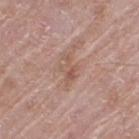

ISIC_0015845
(127, 127)


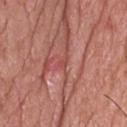

ISIC_0015864
(145, 145)


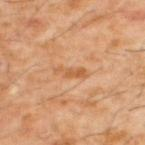

In [30]:
with h5py.File(TRAIN_IMAGES_FILE) as f:
    keys = list(f.keys())
    for key in keys[:3]:
        print(key)
        d = f[key]

        image = to_image(d[()])
        print(image.size)
        image.show()

In [31]:
with h5py.File(TRAIN_IMAGES_FILE) as f:
    keys = f.keys()
    images = [to_image(f[key][()]) for key in keys]

In [32]:
from matplotlib import pyplot as plt

# all squares
assert all(image.size[0] == image.size[1] for image in images)

min_dim = min(image.size[0] for image in images)
max_dim = max(image.size[0] for image in images)

min_dim, max_dim

(41, 269)

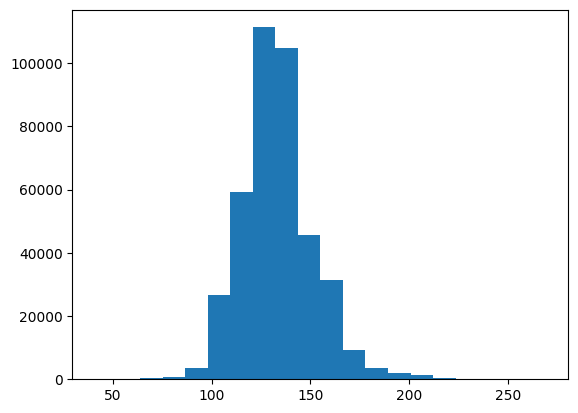

In [33]:
plt.hist([image.size[0] for image in images], bins=20)
plt.show()

# Image Scaling

Images are square images with sizes ranging from 41 to 269. Most images have sidese between 100 and 150.

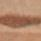

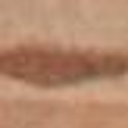

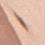

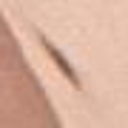

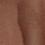

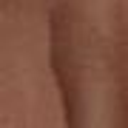

In [37]:
# get the 5 smallest images
sorted_images = sorted(images, key=lambda i: i.size[0])
smallest_images = sorted_images[:3]

for image in smallest_images:
    image.show()
    image.resize((128, 128)).show()

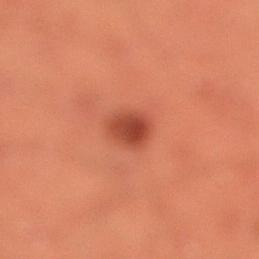

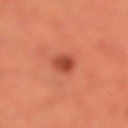

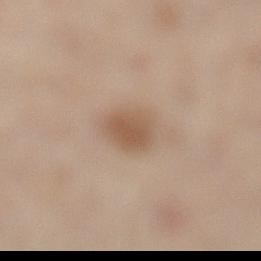

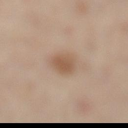

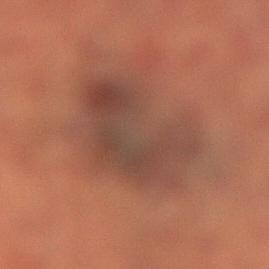

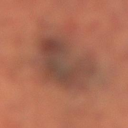

In [38]:
large_images = sorted_images[-3:]
for image in large_images:
    image.show()
    image.resize((128, 128)).show()

# Metadata

In [6]:
import pandas as pd

df = pd.read_csv(TRAIN_METADATA_FILE)

len(df)

/tmp/ipykernel_2243/283165967.py:3: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(TRAIN_METADATA_FILE)


401059

In [7]:
df.head()

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510
